# Random Variates

## Preliminaries

In [1]:
using Pkg

PROJ_DIR = dirname(pwd())

Pkg.activate(PROJ_DIR)
Pkg.resolve()
Pkg.instantiate()

  Activating environment at `~/Github/RandomVariates.jl/Project.toml`
  No Changes to `~/Github/RandomVariates.jl/Project.toml`
  No Changes to `~/Github/RandomVariates.jl/Manifest.toml`
Precompiling project...
  ✓ RandomVariates
  1 dependency successfully precompiled in 11 seconds (121 already precompiled)


In [2]:
using Random
using RandomVariates
using Statistics
using Distributions
using HypothesisTests
using Gadfly
import Cairo, Fontconfig

┌ Info: Precompiling RandomVariates [345a731f-e7b6-46b5-981e-9c1174fc0482]
└ @ Base loading.jl:1342
┌ Warning: Package RandomVariates does not have LinearAlgebra in its dependencies:
│ - If you have RandomVariates checked out for development and have
│   added LinearAlgebra as a dependency but haven't updated your primary
│   environment's manifest file, try `Pkg.resolve()`.
│ - Otherwise you may need to report an issue with RandomVariates
└ Loading LinearAlgebra into RandomVariates from project dependency, future warnings for RandomVariates are suppressed.


In [9]:
n = 100000

100000

In [62]:
function run_tests(dist, rng, n, args...)
    ad = []
    ks = []
    ww = []
    bp1 = []
    bp5 = []
    bp10 = []
    bp100 = []
    for _ in 1:30
        X = vec(rng(args..., n))
        Y = vec(rand(d, n))
        append!(ad, pvalue(KSampleADTest(X, Y)))
        append!(ks, pvalue(ApproximateTwoSampleKSTest(X, Y)))
        append!(ww, pvalue(WaldWolfowitzTest(X)))
        append!(bp1, pvalue(BoxPierceTest(X, 1)))
        append!(bp5, pvalue(BoxPierceTest(X, 5)))
        append!(bp10, pvalue(BoxPierceTest(X, 10)))
        append!(bp100, pvalue(BoxPierceTest(X, 100)))
    end
    return Dict(
        "Anderson-Darling" => mean(ad), 
        "Kolmogorov-Smirnov" => mean(ks),
        "Wald-Wolfowitz" => mean(ww),
        "Box-Pierce-1" => mean(bp1),
        "Box-Pierce-5" => mean(bp5),
        "Box-Pierce-10" => mean(bp10),
        "Box-Pierce-100" => mean(bp100),
    )
end

run_tests (generic function with 2 methods)

## Uniform RNG Tests

In [11]:
x = uniform_rng(0, 1, n)
d = Uniform()

Uniform{Float64}(a=0.0, b=1.0)

In [12]:
OneSampleADTest(x, d)

One sample Anderson-Darling test
--------------------------------
Population details:
    parameter of interest:   not implemented yet
    value under h_0:         NaN
    point estimate:          NaN

Test summary:
    outcome with 95% confidence: fail to reject h_0
    one-sided p-value:           0.6910

Details:
    number of observations:   100000
    sample mean:              0.5000669435121569
    sample SD:                0.28828471460402577
    A² statistic:             0.5555300044590431


In [13]:
ExactOneSampleKSTest(x, d)

Exact one sample Kolmogorov-Smirnov test
----------------------------------------
Population details:
    parameter of interest:   Supremum of CDF differences
    value under h_0:         0.0
    point estimate:          0.00294656

Test summary:
    outcome with 95% confidence: fail to reject h_0
    two-sided p-value:           0.3504

Details:
    number of observations:   100000


In [14]:
WaldWolfowitzTest(x)

Wald-Wolfowitz Test
-------------------
Population details:
    parameter of interest:   Number of runs
    value under h_0:         50001.0
    point estimate:          49759

Test summary:
    outcome with 95% confidence: fail to reject h_0
    two-sided p-value:           0.1259

Details:
    number of runs:  49759
    z-statistic:     -1.530550040367358


In [15]:
BoxPierceTest(x, 5)

Box-Pierce autocorrelation test
-------------------------------
Population details:
    parameter of interest:   autocorrelations up to lag k
    value under h_0:         "all zero"
    point estimate:          NaN

Test summary:
    outcome with 95% confidence: fail to reject h_0
    one-sided p-value:           0.7197

Details:
    number of observations:         100000
    number of lags:                 5
    degrees of freedom correction:  0
    Q statistic:                    2.87216


In [28]:
run_tests(d, uniform_rng, 0, 1, n)

Dict{String, Float64} with 7 entries:
  "Anderson-Darling"   => 0.48392
  "Box-Pierce-10"      => 0.5639
  "Box-Pierce-5"       => 0.499327
  "Box-Pierce-100"     => 0.544293
  "Kolmogorov-Smirnov" => 0.473647
  "Wald-Wolfowitz"     => 0.461021
  "Box-Pierce-1"       => 0.481279

## Normal RNG Tests

In [8]:
x = normal_rng(0, 1, n)
d = Normal()

Normal{Float64}(μ=0.0, σ=1.0)

In [9]:
ExactOneSampleKSTest(x, d)

Exact one sample Kolmogorov-Smirnov test
----------------------------------------
Population details:
    parameter of interest:   Supremum of CDF differences
    value under h_0:         0.0
    point estimate:          0.00119128

Test summary:
    outcome with 95% confidence: fail to reject h_0
    two-sided p-value:           0.1170

Details:
    number of observations:   1000000


In [10]:
WaldWolfowitzTest(x)

Wald-Wolfowitz Test
-------------------
Population details:
    parameter of interest:   Number of runs
    value under h_0:         500001.0
    point estimate:          499451

Test summary:
    outcome with 95% confidence: fail to reject h_0
    two-sided p-value:           0.2713

Details:
    number of runs:  499451
    z-statistic:     -1.1000005500009626


## Poisson RNG Tests

In [29]:
x = poisson_rng(7, 10000)
d = Poisson(7)
y = rand(d, 10000)
xmin, xmax = (0, 20)
ymax = 0.2

p1 = plot(x=x, Geom.histogram(density=true), Guide.title("RandomVariates.jl"), Coord.cartesian(xmin=xmin, xmax=xmax, ymax=ymax))
p2 = plot(x=y, Geom.histogram(density=true), Guide.title("Distributions.jl"), Coord.cartesian(xmin=xmin, xmax=xmax, ymax=ymax))
hstack(p1, p2)

LoadError: InterruptException:

In [42]:
MannWhitneyUTest(vec(x),y)

Approximate Mann-Whitney U test
-------------------------------
Population details:
    parameter of interest:   Location parameter (pseudomedian)
    value under h_0:         0
    point estimate:          0.0

Test summary:
    outcome with 95% confidence: fail to reject h_0
    two-sided p-value:           0.5407

Details:
    number of observations in each group: [10000, 10000]
    Mann-Whitney-U statistic:             4.97519e7
    rank sums:                            [9.97569e7, 1.00253e8]
    adjustment for ties:                  1.05829e11
    normal approximation (μ, σ):          (-2.4811e5, 4.05549e5)


In [43]:
fit(Poisson, x)

Poisson{Float64}(λ=6.9665)

In [101]:
x = poisson_rng(7,10000)
d = Poisson(7)
y = rand(d, 10000)
# run_tests(d, normal_rng, n)
# KSampleADTest(vec(x), vec(y))
# ApproximateTwoSampleKSTest(vec(x), vec(y))
ChisqTest(x)  # for discrete

Pearson's Chi-square Test
-------------------------
Population details:
    parameter of interest:   Multinomial Probabilities
    value under h_0:         [0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001  …  0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001]
    point estimate:          [7.12291e-5, 9.97208e-5, 7.12291e-5, 8.5475e-5, 0.000185196, 7.12291e-5, 0.000113967, 0.000142458, 0.00017095, 0.000113967  …  0.000128212, 5.69833e-5, 8.5475e-5, 7.12291e-5, 9.97208e-5, 0.000156704, 7.12291e-5, 0.000113967, 9.97208e-5, 7.12291e-5]
    95% confidence interval: [(0.0, 0.0003069), (0.0, 0.0003354), (0.0, 0.0003069), (0.0, 0.0003211), (0.0, 0.0004208), (0.0, 0.0003069), (0.0, 0.0003496), (0.0, 0.0003781), (0.0, 0.0004066), (0.0, 0.0003496)  …  (0.0, 0.0003639), (0.0, 0.0002926), (0.0, 0.0003211), (0.0, 0.0003069), (0.0, 0.0003354), (0.0, 0.0003924), (0.0, 0.0003069), (0.0, 0.0003496), (0.0, 0.0003354), (0.0, 0.0003069)]

Test sum

In [103]:
BoxPierceTest(vec(x), 5)

Box-Pierce autocorrelation test
-------------------------------
Population details:
    parameter of interest:   autocorrelations up to lag k
    value under h_0:         "all zero"
    point estimate:          NaN

Test summary:
    outcome with 95% confidence: fail to reject h_0
    one-sided p-value:           0.4811

Details:
    number of observations:         10000
    number of lags:                 5
    degrees of freedom correction:  0
    Q statistic:                    4.49079


## Geometric RNG Tests

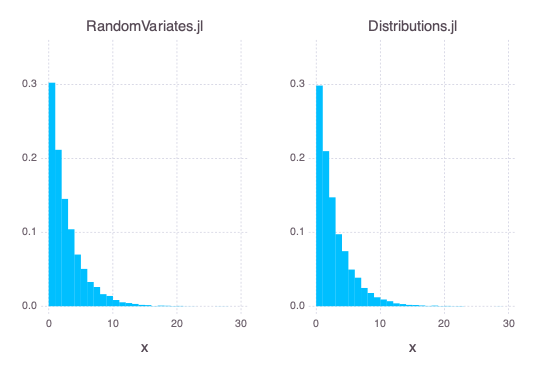

In [33]:
x = geometric_rng(.3, 10000)
d = Geometric(.3)
y = rand(d, 10000)

p1 = plot(x=x, Geom.histogram(density=true), Guide.title("RandomVariates.jl"), Coord.cartesian(xmin=0, xmax=30, ymax=.35))
p2 = plot(x=y, Geom.histogram(density=true), Guide.title("Distributions.jl"), Coord.cartesian(xmin=0, xmax=30, ymax=.35))
hstack(p1, p2)

In [34]:
MannWhitneyUTest(x,y)

Approximate Mann-Whitney U test
-------------------------------
Population details:
    parameter of interest:   Location parameter (pseudomedian)
    value under h_0:         0
    point estimate:          0.0

Test summary:
    outcome with 95% confidence: fail to reject h_0
    two-sided p-value:           0.3051

Details:
    number of observations in each group: [10000, 10000]
    Mann-Whitney-U statistic:             4.959e7
    rank sums:                            [9.9595e7, 1.00415e8]
    adjustment for ties:                  3.29585e11
    normal approximation (μ, σ):          (-4.1001e5, 3.9976e5)


In [35]:
fit(Geometric, x)

Geometric{Float64}(p=0.3013591296748335)

## Binomial RNG Tests

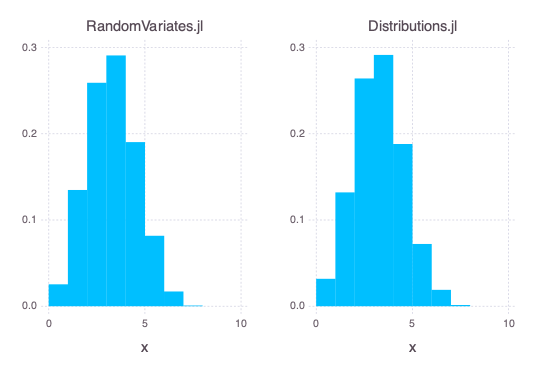

In [47]:
x = binomial_rng(.4, 7, 10000)
d = Binomial(7, .4)
y = rand(d, 10000)
xmin, xmax = (0, 10)
ymax = nothing

p1 = plot(x=x, Geom.histogram(density=true), Guide.title("RandomVariates.jl"), Coord.cartesian(xmin=xmin, xmax=xmax, ymax=ymax))
p2 = plot(x=y, Geom.histogram(density=true), Guide.title("Distributions.jl"), Coord.cartesian(xmin=xmin, xmax=xmax, ymax=ymax))
hstack(p1, p2)

In [49]:
MannWhitneyUTest(vec(x),y)

Approximate Mann-Whitney U test
-------------------------------
Population details:
    parameter of interest:   Location parameter (pseudomedian)
    value under h_0:         0
    point estimate:          0.0

Test summary:
    outcome with 95% confidence: fail to reject h_0
    two-sided p-value:           0.0957

Details:
    number of observations in each group: [10000, 10000]
    Mann-Whitney-U statistic:             5.06622e7
    rank sums:                            [1.00667e8, 9.93428e7]
    adjustment for ties:                  4.17613e11
    normal approximation (μ, σ):          (662242.0, 3.9746e5)


In [55]:
fit(Binomial, 7, vec(x))

Binomial{Float64}(n=7, p=0.4004714285714286)

## Gamma RNG Tests

!! Gamma RNG needs fixed. See Law pp 453.

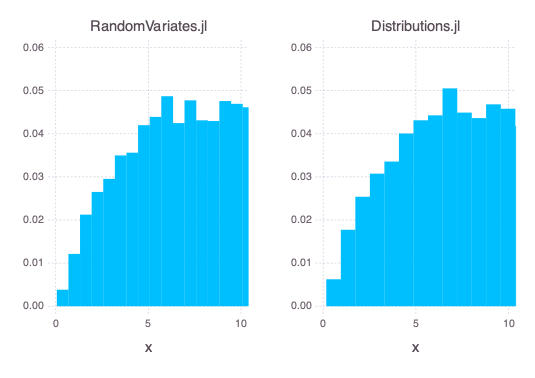

In [8]:
# x = expon_rng(1, 10000)  # Interesting! Expon(1) ~ Gamma(1,1) 
x = gamma_rng(2,8,10000)
d = Gamma(2,8)
y = rand(d, 10000)
xmin, xmax = (0, 10)
ymax = 0.06

p1 = plot(x=x, Geom.histogram(density=true), Guide.title("RandomVariates.jl"), Coord.cartesian(xmin=xmin, xmax=xmax, ymax=ymax))
p2 = plot(x=y, Geom.histogram(density=true), Guide.title("Distributions.jl"), Coord.cartesian(xmin=xmin, xmax=xmax, ymax=ymax))
hstack(p1, p2)

In [5]:
MannWhitneyUTest(vec(x),y)

Approximate Mann-Whitney U test
-------------------------------
Population details:
    parameter of interest:   Location parameter (pseudomedian)
    value under h_0:         0
    point estimate:          0.218313

Test summary:
    outcome with 95% confidence: fail to reject h_0
    two-sided p-value:           0.7627

Details:
    number of observations in each group: [10000, 10000]
    Mann-Whitney-U statistic:             5.01232e7
    rank sums:                            [1.00128e8, 9.98818e7]
    adjustment for ties:                  0.0
    normal approximation (μ, σ):          (123249.0, 4.08258e5)


In [6]:
fit(Gamma, vec(x))

Gamma{Float64}(α=1.9779363689461291, θ=8.089439081043755)